In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from time import time
from IPython.display import display

%matplotlib inline

### Load in the data and display some

In [14]:
fAndMVP_data = pd.read_csv("NBA Finals and MVP.csv", delimiter=',')
NBA_data = pd.read_csv("NBA_Dataset.csv")
hrbp_df = pd.read_csv("historical_RAPTOR_by_player.csv")
hrbt_df = pd.read_csv("historical_RAPTOR_by_team.csv")
lrbp_df = pd.read_csv("latest_RAPTOR_by_player.csv")
lrbt_df = pd.read_csv("latest_RAPTOR_by_team.csv")
mrbp_df = pd.read_csv("modern_RAPTOR_by_player.csv")
mrbt_df = pd.read_csv("modern_RAPTOR_by_team.csv")
display(hrbp_df.head(n=10))


# display(fAndMVP_data.head(n=5))
# display(NBA_data.head(n=10))

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922
5,Kareem Abdul-Jabbar,abdulka01,1977,7674,3483,4.544044,3.103855,7.647899,18.488255,15.456216,3.032039,4.762807,2.624501,7.387308,-0.502962
6,Kareem Abdul-Jabbar,abdulka01,1978,5343,2399,3.447574,3.423490,6.871064,11.688727,11.478972,0.209755,3.944529,2.820569,6.765097,-0.566163
7,Kareem Abdul-Jabbar,abdulka01,1979,7826,3524,2.950435,2.534175,5.484610,14.739138,13.203270,1.535868,3.238178,2.029599,5.267777,-0.799426
8,Kareem Abdul-Jabbar,abdulka01,1980,8226,3761,3.121840,2.430631,5.552471,15.920002,12.849811,3.070190,3.409151,1.682673,5.091824,-0.726437
9,Kareem Abdul-Jabbar,abdulka01,1981,6716,3110,2.374990,1.802589,4.177579,10.928773,10.599289,0.329484,2.545213,1.212412,3.757625,-0.609847


In [16]:
# check for nulls and replace if needed
NBA_data.fillna({'fg_pct': -1.0}, inplace=True)
NBA_data.fillna({'fg3_pct': -1.0}, inplace=True)
NBA_data.fillna({'fg2_pct': -1.0}, inplace=True)
NBA_data.fillna({'efg_pct': -1.0}, inplace=True)
NBA_data.fillna({'ft_pct': -1.0}, inplace=True)
# NBA_data.isnull().any()
hrbp_df.fillna({'pace_impact': 0.0}, inplace=True)
hrbp_df.isnull().any()

# hrbt_df.isnull().any()
# lrbp_df.isnull().any()
# lrbt_df.isnull().any()
# mrbp_df.isnull().any()
# mrbt_df.isnull().any()

player_name         False
player_id           False
season              False
poss                False
mp                  False
raptor_offense      False
raptor_defense      False
raptor_total        False
war_total           False
war_reg_season      False
war_playoffs        False
predator_offense    False
predator_defense    False
predator_total      False
pace_impact         False
dtype: bool

In [17]:
# check for nulls
fAndMVP_data.isnull().any()

index                False
Year                 False
Western Champion     False
Eastern Champion     False
Result               False
NBA Champion         False
NBA Vice-Champion    False
Final Sweep ?        False
MVP Name              True
MVP Height (m)        True
MVP Height (ft)       True
MVP Position          True
MVP Team              True
MVP Nationality       True
MVP status            True
dtype: bool

In [19]:
# get the number of players in each dataset'
n_players_fmvp = fAndMVP_data.shape[0]
n_players_NBA = NBA_data.shape[0]
n_hrbp_df = hrbp_df.shape[0]
# get a subset of all the numerical stats for the dataset
hrbp_subset = hrbp_df.iloc[:,3:-1]

array([[<Axes: xlabel='poss', ylabel='poss'>,
        <Axes: xlabel='mp', ylabel='poss'>,
        <Axes: xlabel='raptor_offense', ylabel='poss'>,
        <Axes: xlabel='raptor_defense', ylabel='poss'>,
        <Axes: xlabel='raptor_total', ylabel='poss'>,
        <Axes: xlabel='war_total', ylabel='poss'>,
        <Axes: xlabel='war_reg_season', ylabel='poss'>,
        <Axes: xlabel='war_playoffs', ylabel='poss'>,
        <Axes: xlabel='predator_offense', ylabel='poss'>,
        <Axes: xlabel='predator_defense', ylabel='poss'>,
        <Axes: xlabel='predator_total', ylabel='poss'>],
       [<Axes: xlabel='poss', ylabel='mp'>,
        <Axes: xlabel='mp', ylabel='mp'>,
        <Axes: xlabel='raptor_offense', ylabel='mp'>,
        <Axes: xlabel='raptor_defense', ylabel='mp'>,
        <Axes: xlabel='raptor_total', ylabel='mp'>,
        <Axes: xlabel='war_total', ylabel='mp'>,
        <Axes: xlabel='war_reg_season', ylabel='mp'>,
        <Axes: xlabel='war_playoffs', ylabel='mp'>,
        <

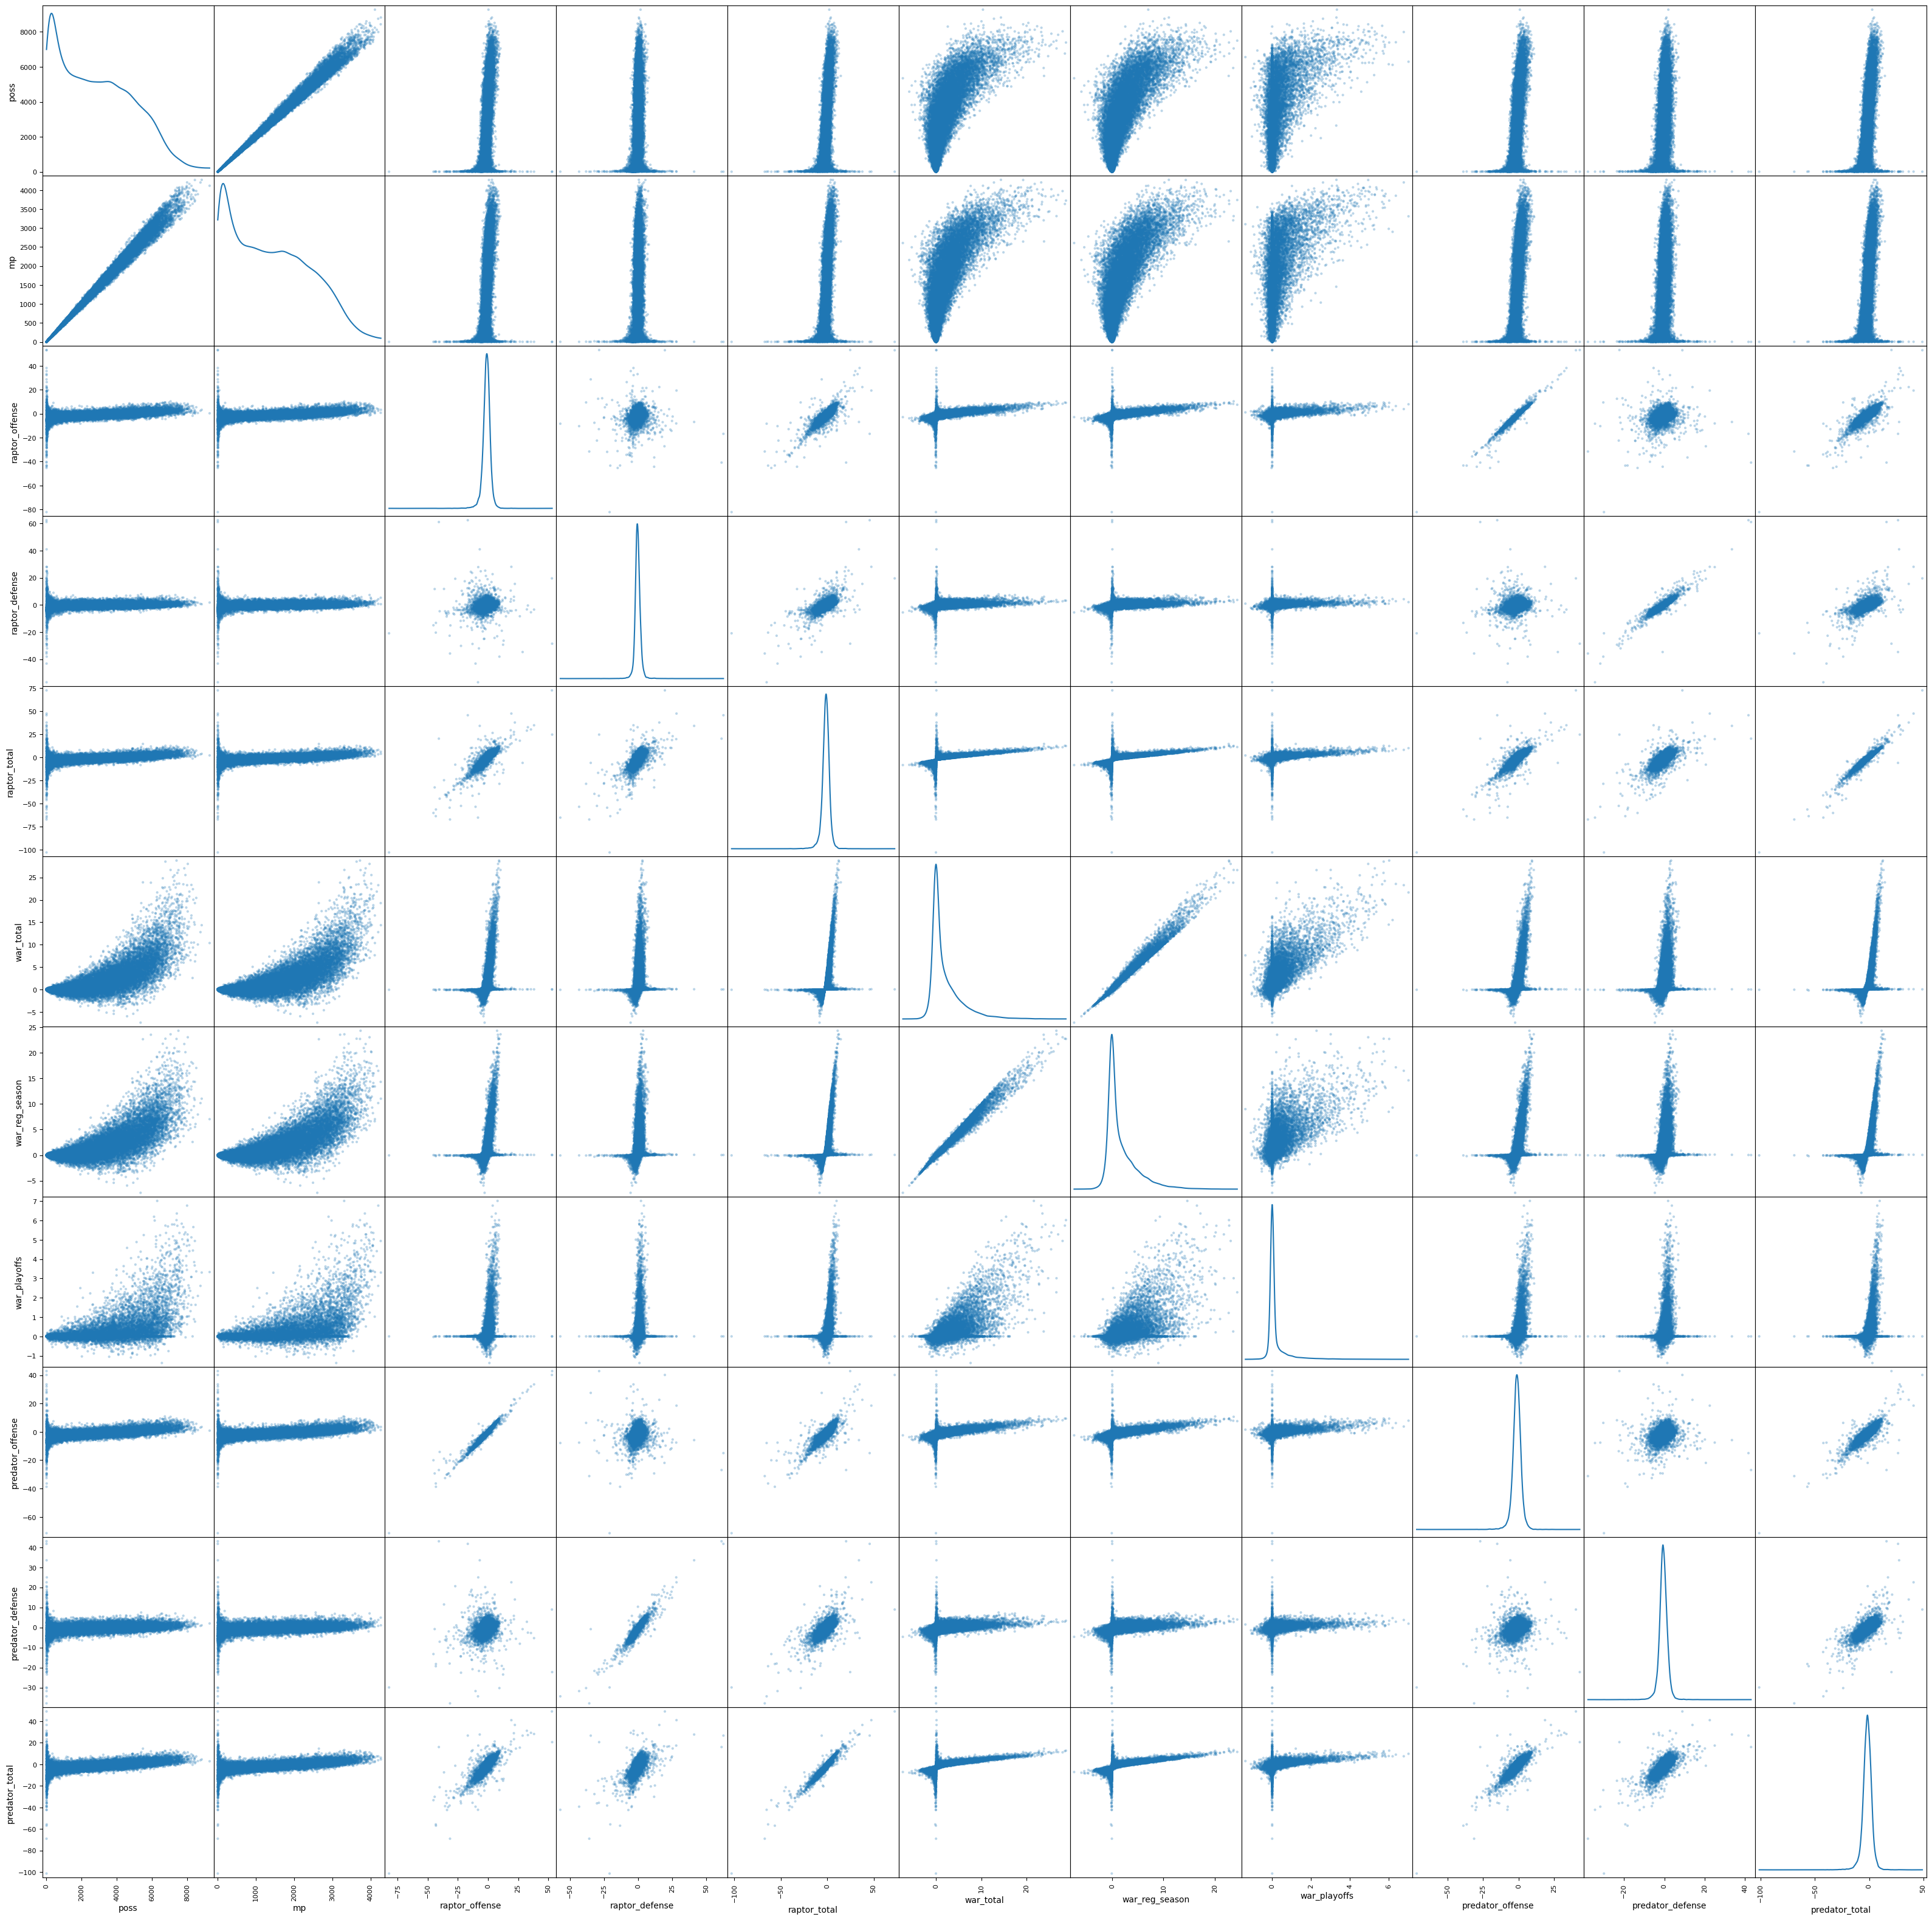

In [20]:
pd.plotting.scatter_matrix(hrbp_subset, alpha=0.3, figsize= (40, 40), diagonal="kde")

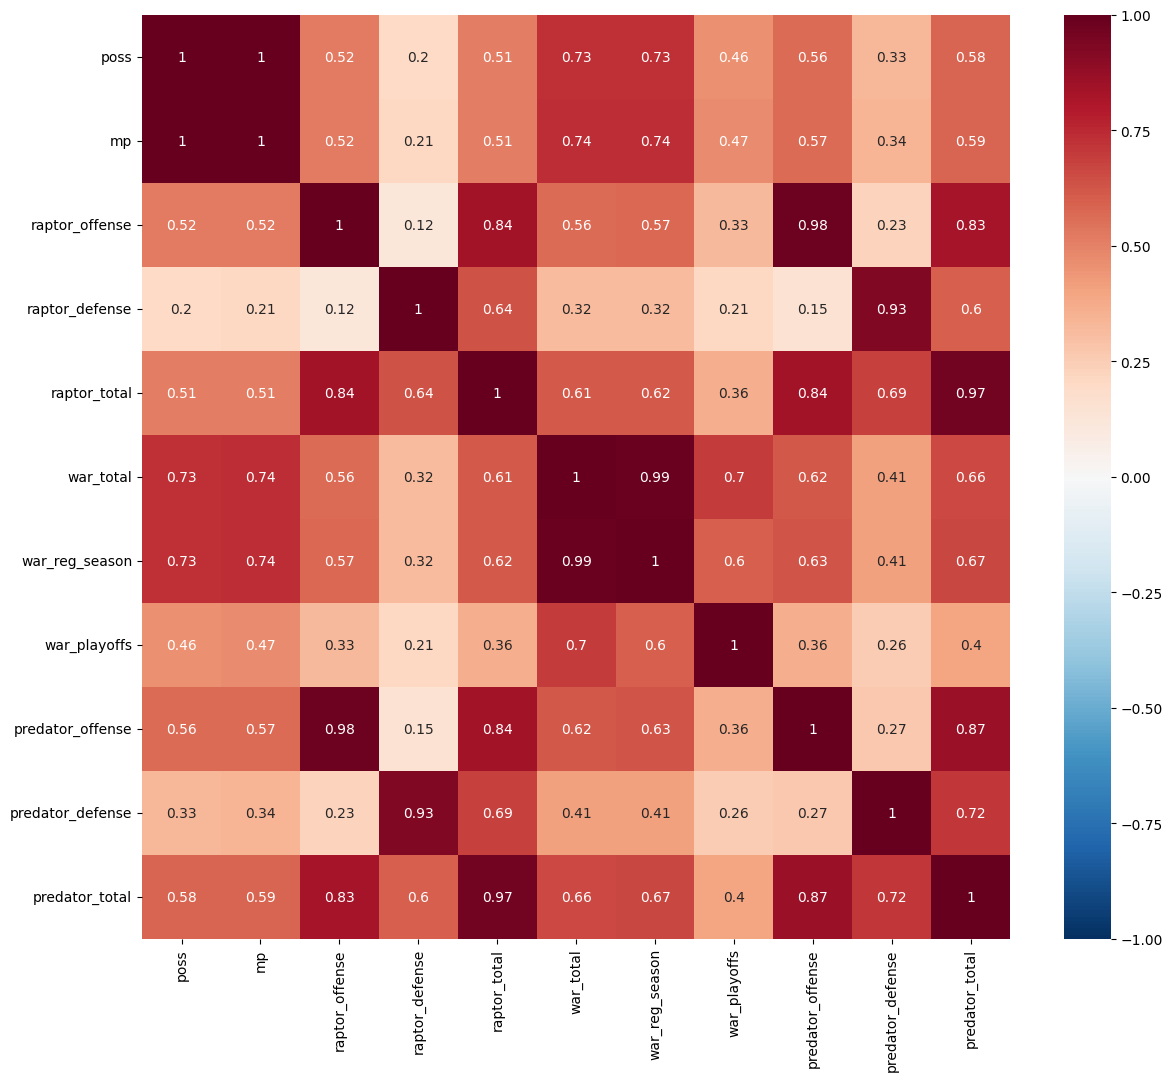

In [21]:
# show the correlation between differnt RAPTOR stats
correlation = hrbp_subset.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")